## Load Data

In [1]:
import MDAnalysis
import MDAnalysis.analysis.rms
import numpy as np
import nglview as nv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import sys
sys.path.append('../')
import prox

Packages imported


In [2]:
#Pickle allows you to save python objects as files and then load them back into 
#objects. This way you can save analysis results and load them at a later date or in another notebook

import pickle
def save(dObj, sFilename):
  '''Given an object and a file name, write the object to the file using pickle.'''

  f = open(sFilename, "wb")
  p = pickle.Pickler(f)
  p.dump(dObj)
  f.close()

def load(sFilename):
  '''Given a file name, load and return the object stored in the file.'''

  f = open(sFilename, "rb")
  u = pickle.Unpickler(f)
  dObj = u.load()
  f.close()
  return dObj

In [3]:
# This was only used to transfer files, it is not necessary to run this script
# If any of the data files are changed in their respective directories in ws9/cgavinhann/ACP/ this script will update the files in this directory
'''
!cp ../ACP/190604.1.1/190604.1_pickleRMSD_dictionary ./data/
!cp ../ACP/190604.2.1/190604.2_pickleRMSD_dictionary ./data/
!cp ../ACP/190604.1.1/190604.1_pickleGyration_dictionary ./data/
!cp ../ACP/190604.2.1/190604.2_pickleGyration_dictionary ./data/
!cp ../ACP/190604.1.1/190604.1_pickleSASA_dictionary ./data/
!cp ../ACP/190604.2.1/190604.2_pickleSASA_dictionary ./data/
!cp ../ACP/190604.1.1/190604.1_pickleDihedral_dictionary ./data/
!cp ../ACP/190604.2.1/190604.2_pickleDihedral_dictionary ./data/
!cp ../ACP/190604.1.1/190604.1_pickleResidues ./data/
!cp ../ACP/190604.2.1/190604.2_pickleResidues ./data/

!cp ../ACP/190604.3.1/190604.3_pickleRMSD_dictionary ./data/
!cp ../ACP/190604.4.1/190604.4_pickleRMSD_dictionary ./data/
!cp ../ACP/190604.3.1/190604.3_pickleGyration_dictionary ./data/
!cp ../ACP/190604.4.1/190604.4_pickleGyration_dictionary ./data/
!cp ../ACP/190604.3.1/190604.3_pickleSASA_dictionary ./data/
!cp ../ACP/190604.4.1/190604.4_pickleSASA_dictionary ./data/
!cp ../ACP/190604.3.1/190604.3_pickleDihedral_dictionary ./data/
!cp ../ACP/190604.4.1/190604.4_pickleDihedral_dictionary ./data/
!cp ../ACP/190604.3.1/190604.3_pickleResidues ./data/
!cp ../ACP/190604.4.1/190604.4_pickleResidues ./data/

!cp ../ACP/190604.5.1/190604.5_pickleRMSD_dictionary ./data/
!cp ../ACP/190604.6.1/190604.6_pickleRMSD_dictionary ./data/
!cp ../ACP/190604.5.1/190604.5_pickleGyration_dictionary ./data/
!cp ../ACP/190604.6.1/190604.6_pickleGyration_dictionary ./data/
!cp ../ACP/190604.5.1/190604.5_pickleSASA_dictionary ./data/
!cp ../ACP/190604.6.1/190604.6_pickleSASA_dictionary ./data/
!cp ../ACP/190604.5.1/190604.5_pickleDihedral_dictionary ./data/
!cp ../ACP/190604.6.1/190604.6_pickleDihedral_dictionary ./data/
!cp ../ACP/190604.5.1/190604.5_pickleResidues ./data/
!cp ../ACP/190604.6.1/190604.6_pickleResidues ./data/

!cp ../ACP/190612.1/190612_pickleRMSD_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleRMSD_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleGyration_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleGyration_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleSASA_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleSASA_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleDihedral_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleDihedral_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleResidues ./data/
!cp ../ACP/190625.1/190625_pickleResidues ./data/

!cp ../ACP/190612.1/190612_pickleRMSD_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleRMSD_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleGyration_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleGyration_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleSASA_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleSASA_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleDihedral_dictionary ./data/
!cp ../ACP/190625.1/190625_pickleDihedral_dictionary ./data/
!cp ../ACP/190612.1/190612_pickleResidues ./data/
!cp ../ACP/190625.1/190625_pickleResidues ./data/

!cp ../ACP/190626.1/190626_pickleRMSD_dictionary ./data/
!cp ../ACP/190627.1/190627_pickleRMSD_dictionary ./data/
!cp ../ACP/190626.1/190626_pickleGyration_dictionary ./data/
!cp ../ACP/190627.1/190627_pickleGyration_dictionary ./data/
!cp ../ACP/190626.1/190626_pickleSASA_dictionary ./data/
!cp ../ACP/190627.1/190627_pickleSASA_dictionary ./data/
!cp ../ACP/190626.1/190626_pickleDihedral_dictionary ./data/
!cp ../ACP/190627.1/190627_pickleDihedral_dictionary ./data/
!cp ../ACP/190626.1/190626_pickleResidues ./data/
!cp ../ACP/190627.1/190627_pickleResidues ./data/

!cp ../ACP/190628.1/190628_pickleRMSD_dictionary ./data/
!cp ../ACP/190629.1/190629_pickleRMSD_dictionary ./data/
!cp ../ACP/190628.1/190628_pickleGyration_dictionary ./data/
!cp ../ACP/190629.1/190629_pickleGyration_dictionary ./data/
!cp ../ACP/190628.1/190628_pickleSASA_dictionary ./data/
!cp ../ACP/190629.1/190629_pickleSASA_dictionary ./data/
!cp ../ACP/190628.1/190628_pickleDihedral_dictionary ./data/
!cp ../ACP/190629.1/190629_pickleDihedral_dictionary ./data/
!cp ../ACP/190628.1/190628_pickleResidues_C ./data/
!cp ../ACP/190629.1/190629_pickleResidues_C ./data/
!cp ../ACP/190628.1/190628_pickleResidues_D ./data/
!cp ../ACP/190629.1/190629_pickleResidues_D ./data/

!cp ../ACP/200101/200101.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200101/200101.1_pickleGyration_dictionary ./data/
!cp ../ACP/200101/200101.1_pickleSASA_dictionary ./data/
!cp ../ACP/200101/200101.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200101/200101.1_pickleResidues ./data/

!cp ../ACP/200102/200102.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200102/200102.1_pickleGyration_dictionary ./data/
!cp ../ACP/200102/200102.1_pickleSASA_dictionary ./data/
!cp ../ACP/200102/200102.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200102/200102.1_pickleResidues ./data/

!cp ../ACP/200103/200103.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200103/200103.1_pickleGyration_dictionary ./data/
!cp ../ACP/200103/200103.1_pickleSASA_dictionary ./data/
!cp ../ACP/200103/200103.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200103/200103.1_pickleResidues ./data/

!cp ../ACP/200104/200104.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200104/200104.1_pickleGyration_dictionary ./data/
!cp ../ACP/200104/200104.1_pickleSASA_dictionary ./data/
!cp ../ACP/200104/200104.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200104/200104.1_pickleResidues ./data/

!cp ../ACP/200105/200105.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200105/200105.1_pickleGyration_dictionary ./data/
!cp ../ACP/200105/200105.1_pickleSASA_dictionary ./data/
!cp ../ACP/200105/200105.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200105/200105.1_pickleResidues ./data/

!cp ../ACP/200106/200106.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200106/200106.1_pickleGyration_dictionary ./data/
!cp ../ACP/200106/200106.1_pickleSASA_dictionary ./data/
!cp ../ACP/200106/200106.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200106/200106.1_pickleResidues ./data/

!cp ../ACP/200107/200107.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200107/200107.1_pickleGyration_dictionary ./data/
!cp ../ACP/200107/200107.1_pickleSASA_dictionary ./data/
!cp ../ACP/200107/200107.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200107/200107.1_pickleResidues ./data/

!cp ../ACP/200108/200108.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200108/200108.1_pickleGyration_dictionary ./data/
!cp ../ACP/200108/200108.1_pickleSASA_dictionary ./data/
!cp ../ACP/200108/200108.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200108/200108.1_pickleResidues ./data/

!cp ../ACP/200109/200109.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200109/200109.1_pickleGyration_dictionary ./data/
!cp ../ACP/200109/200109.1_pickleSASA_dictionary ./data/
!cp ../ACP/200109/200109.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200109/200109.1_pickleResidues ./data/

!cp ../ACP/200110/200110.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200110/200110.1_pickleGyration_dictionary ./data/
!cp ../ACP/200110/200110.1_pickleSASA_dictionary ./data/
!cp ../ACP/200110/200110.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200110/200110.1_pickleResidues ./data/

!cp ../ACP/200111/200111.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200111/200111.1_pickleGyration_dictionary ./data/
!cp ../ACP/200111/200111.1_pickleSASA_dictionary ./data/
!cp ../ACP/200111/200111.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200111/200111.1_pickleResidues ./data/

!cp ../ACP/200112/200112.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200112/200112.1_pickleGyration_dictionary ./data/
!cp ../ACP/200112/200112.1_pickleSASA_dictionary ./data/
!cp ../ACP/200112/200112.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200112/200112.1_pickleResidues ./data/

!cp ../ACP/200113/200113.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200113/200113.1_pickleGyration_dictionary ./data/
!cp ../ACP/200113/200113.1_pickleSASA_dictionary ./data/
!cp ../ACP/200113/200113.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200113/200113.1_pickleResidues ./data/

!cp ../ACP/200115/200115.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200115/200115.1_pickleGyration_dictionary ./data/
!cp ../ACP/200115/200115.1_pickleSASA_dictionary ./data/
!cp ../ACP/200115/200115.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200115/200115.1_pickleResidues ./data/

!cp ../ACP/200116/200116.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200116/200116.1_pickleGyration_dictionary ./data/
!cp ../ACP/200116/200116.1_pickleSASA_dictionary ./data/
!cp ../ACP/200116/200116.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200116/200116.1_pickleResidues ./data/

!cp ../ACP/200117/200117.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200117/200117.1_pickleGyration_dictionary ./data/
!cp ../ACP/200117/200117.1_pickleSASA_dictionary ./data/
!cp ../ACP/200117/200117.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200117/200117.1_pickleResidues ./data/

!cp ../ACP/200118/200118.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200118/200118.1_pickleGyration_dictionary ./data/
!cp ../ACP/200118/200118.1_pickleSASA_dictionary ./data/
!cp ../ACP/200118/200118.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200118/200118.1_pickleResidues ./data/

!cp ../ACP/200119/200119.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200119/200119.1_pickleGyration_dictionary ./data/
!cp ../ACP/200119/200119.1_pickleSASA_dictionary ./data/
!cp ../ACP/200119/200119.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200119/200119.1_pickleResidues ./data/

!cp ../ACP/200120/200120.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200120/200120.1_pickleGyration_dictionary ./data/
!cp ../ACP/200120/200120.1_pickleSASA_dictionary ./data/
!cp ../ACP/200120/200120.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200120/200120.1_pickleResidues ./data/

!cp ../ACP/200121/200121.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200121/200121.1_pickleGyration_dictionary ./data/
!cp ../ACP/200121/200121.1_pickleSASA_dictionary ./data/
!cp ../ACP/200121/200121.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200121/200121.1_pickleResidues ./data/

!cp ../ACP/200122/200122.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200122/200122.1_pickleGyration_dictionary ./data/
!cp ../ACP/200122/200122.1_pickleSASA_dictionary ./data/
!cp ../ACP/200122/200122.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200122/200122.1_pickleResidues ./data/

!cp ../ACP/200123/200123.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200123/200123.1_pickleGyration_dictionary ./data/
!cp ../ACP/200123/200123.1_pickleSASA_dictionary ./data/
!cp ../ACP/200123/200123.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200123/200123.1_pickleResidues ./data/

!cp ../ACP/200124/200124.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200124/200124.1_pickleGyration_dictionary ./data/
!cp ../ACP/200124/200124.1_pickleSASA_dictionary ./data/
!cp ../ACP/200124/200124.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200124/200124.1_pickleResidues ./data/

!cp ../ACP/200125/200125.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200125/200125.1_pickleGyration_dictionary ./data/
!cp ../ACP/200125/200125.1_pickleSASA_dictionary ./data/
!cp ../ACP/200125/200125.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200125/200125.1_pickleResidues ./data/

!cp ../ACP/200126/200126.1_pickleRMSD_dictionary ./data/
!cp ../ACP/200126/200126.1_pickleGyration_dictionary ./data/
!cp ../ACP/200126/200126.1_pickleSASA_dictionary ./data/
!cp ../ACP/200126/200126.1_pickleDihedral_dictionary ./data/
!cp ../ACP/200126/200126.1_pickleResidues ./data/

!cp ../ACP/200422/200422_pickleSASA_dictionary ./data/
!cp ../ACP/200423/200423_pickleSASA_dictionary ./data/
!cp ../ACP/200424/200424_pickleSASA_dictionary ./data/
!cp ../ACP/200425/200425_pickleSASA_dictionary ./data
!cp ../ACP/200426/200426_pickleSASA_dictionary ./data
!cp ../ACP/200427/200427_pickleSASA_dictionary ./data
!cp ../ACP/191016/191016_pickleSASA_dictionary ./data
'''

'\n!cp ../ACP/190604.1.1/190604.1_pickleRMSD_dictionary ./data/\n!cp ../ACP/190604.2.1/190604.2_pickleRMSD_dictionary ./data/\n!cp ../ACP/190604.1.1/190604.1_pickleGyration_dictionary ./data/\n!cp ../ACP/190604.2.1/190604.2_pickleGyration_dictionary ./data/\n!cp ../ACP/190604.1.1/190604.1_pickleSASA_dictionary ./data/\n!cp ../ACP/190604.2.1/190604.2_pickleSASA_dictionary ./data/\n!cp ../ACP/190604.1.1/190604.1_pickleDihedral_dictionary ./data/\n!cp ../ACP/190604.2.1/190604.2_pickleDihedral_dictionary ./data/\n!cp ../ACP/190604.1.1/190604.1_pickleResidues ./data/\n!cp ../ACP/190604.2.1/190604.2_pickleResidues ./data/\n\n!cp ../ACP/190604.3.1/190604.3_pickleRMSD_dictionary ./data/\n!cp ../ACP/190604.4.1/190604.4_pickleRMSD_dictionary ./data/\n!cp ../ACP/190604.3.1/190604.3_pickleGyration_dictionary ./data/\n!cp ../ACP/190604.4.1/190604.4_pickleGyration_dictionary ./data/\n!cp ../ACP/190604.3.1/190604.3_pickleSASA_dictionary ./data/\n!cp ../ACP/190604.4.1/190604.4_pickleSASA_dictionary ./

In [4]:
dRMSD_190604_1 = load("data/190604.1_pickleRMSD_dictionary")
dRMSD_190604_2 = load("data/190604.2_pickleRMSD_dictionary")
dGyration_190604_1 = load("data/190604.1_pickleGyration_dictionary")
dGyration_190604_2 = load("data/190604.2_pickleGyration_dictionary")
dSASA_190604_1 = load("data/190604.1_pickleSASA_dictionary")
dSASA_190604_2 = load("data/190604.2_pickleSASA_dictionary")
dDihedral_190604_1 = load("data/190604.1_pickleDihedral_dictionary")
dDihedral_190604_2 = load("data/190604.2_pickleDihedral_dictionary")
lResidues_190604_1 = load("data/190604.1_pickleResidues")
lResidues_190604_2 = load("data/190604.2_pickleResidues")

dRMSD_190604_3 = load("data/190604.3_pickleRMSD_dictionary")
dRMSD_190604_4 = load("data/190604.4_pickleRMSD_dictionary")
dGyration_190604_3 = load("data/190604.3_pickleGyration_dictionary")
dGyration_190604_4 = load("data/190604.4_pickleGyration_dictionary")
dSASA_190604_3 = load("data/190604.3_pickleSASA_dictionary")
dSASA_190604_4 = load("data/190604.4_pickleSASA_dictionary")
dDihedral_190604_3 = load("data/190604.3_pickleDihedral_dictionary")
dDihedral_190604_4 = load("data/190604.4_pickleDihedral_dictionary")
lResidues_190604_3 = load("data/190604.3_pickleResidues")
lResidues_190604_4 = load("data/190604.4_pickleResidues")

dRMSD_190604_5 = load("data/190604.5_pickleRMSD_dictionary")
dRMSD_190604_6 = load("data/190604.6_pickleRMSD_dictionary")
dGyration_190604_5 = load("data/190604.5_pickleGyration_dictionary")
dGyration_190604_6 = load("data/190604.6_pickleGyration_dictionary")
dSASA_190604_5 = load("data/190604.5_pickleSASA_dictionary")
dSASA_190604_6 = load("data/190604.6_pickleSASA_dictionary")
dDihedral_190604_5 = load("data/190604.5_pickleDihedral_dictionary")
dDihedral_190604_6 = load("data/190604.6_pickleDihedral_dictionary")
lResidues_190604_5 = load("data/190604.5_pickleResidues")
lResidues_190604_6 = load("data/190604.6_pickleResidues")

dRMSD_190612 = load("data/190612_pickleRMSD_dictionary")
dRMSD_190625 = load("data/190625_pickleRMSD_dictionary")
dGyration_190612 = load("data/190612_pickleGyration_dictionary")
dGyration_190625 = load("data/190625_pickleGyration_dictionary")
dSASA_190612 = load("data/190612_pickleSASA_dictionary")
dSASA_190625 = load("data/190625_pickleSASA_dictionary")
dDihedral_190612 = load("data/190612_pickleDihedral_dictionary")
dDihedral_190625 = load("data/190625_pickleDihedral_dictionary")
lResidues_190612 = load("data/190612_pickleResidues")
lResidues_190625 = load("data/190625_pickleResidues")

dRMSD_190612 = load("data/190612_pickleRMSD_dictionary")
dRMSD_190625 = load("data/190625_pickleRMSD_dictionary")
dGyration_190612 = load("data/190612_pickleGyration_dictionary")
dGyration_190625 = load("data/190625_pickleGyration_dictionary")
dSASA_190612 = load("data/190612_pickleSASA_dictionary")
dSASA_190625 = load("data/190625_pickleSASA_dictionary")
dDihedral_190612 = load("data/190612_pickleDihedral_dictionary")
dDihedral_190625 = load("data/190625_pickleDihedral_dictionary")
lResidues_190612 = load("data/190612_pickleResidues")
lResidues_190625 = load("data/190625_pickleResidues")

dRMSD_190626 = load("data/190626_pickleRMSD_dictionary")
dRMSD_190627 = load("data/190627_pickleRMSD_dictionary")
dGyration_190626 = load("data/190626_pickleGyration_dictionary")
dGyration_190627 = load("data/190627_pickleGyration_dictionary")
dSASA_190626 = load("data/190626_pickleSASA_dictionary")
dSASA_190627 = load("data/190627_pickleSASA_dictionary")
dDihedral_190626 = load("data/190626_pickleDihedral_dictionary")
dDihedral_190627 = load("data/190627_pickleDihedral_dictionary")
lResidues_190626 = load("data/190626_pickleResidues")
lResidues_190627 = load("data/190627_pickleResidues")

dRMSD_190628 = load("data/190628_pickleRMSD_dictionary")
dRMSD_190629 = load("data/190629_pickleRMSD_dictionary")
dGyration_190628 = load("data/190628_pickleGyration_dictionary")
dGyration_190629 = load("data/190629_pickleGyration_dictionary")
dSASA_190628 = load("data/190628_pickleSASA_dictionary")
dSASA_190629 = load("data/190629_pickleSASA_dictionary")
dDihedral_190628 = load("data/190628_pickleDihedral_dictionary")
dDihedral_190629 = load("data/190629_pickleDihedral_dictionary")
lResidues_190628_C = load("data/190628_pickleResidues_C")
lResidues_190629_C = load("data/190629_pickleResidues_C")
lResidues_190628_D = load("data/190628_pickleResidues_D")
lResidues_190629_D = load("data/190629_pickleResidues_D")

dRMSD_200101 = load("data/200101.1_pickleRMSD_dictionary")
dGyration_200101 = load("data/200101.1_pickleGyration_dictionary")
dSASA_200101 = load("data/200101.1_pickleSASA_dictionary")
dDihedral_200101 = load("data/200101.1_pickleDihedral_dictionary")
lResidues_200101 = load("data/200101.1_pickleResidues")

dRMSD_200102 = load("data/200102.1_pickleRMSD_dictionary")
dGyration_200102 = load("data/200102.1_pickleGyration_dictionary")
dSASA_200102 = load("data/200102.1_pickleSASA_dictionary")
dDihedral_200102 = load("data/200102.1_pickleDihedral_dictionary")
lResidues_200102 = load("data/200102.1_pickleResidues")

dRMSD_200103 = load("data/200103.1_pickleRMSD_dictionary")
dGyration_200103 = load("data/200103.1_pickleGyration_dictionary")
dSASA_200103 = load("data/200103.1_pickleSASA_dictionary")
dDihedral_200103 = load("data/200103.1_pickleDihedral_dictionary")
lResidues_200103 = load("data/200103.1_pickleResidues")

dRMSD_200104 = load("data/200104.1_pickleRMSD_dictionary")
dGyration_200104 = load("data/200104.1_pickleGyration_dictionary")
dSASA_200104 = load("data/200104.1_pickleSASA_dictionary")
dDihedral_200104 = load("data/200104.1_pickleDihedral_dictionary")
lResidues_200104 = load("data/200104.1_pickleResidues")

dRMSD_200105 = load("data/200105.1_pickleRMSD_dictionary")
dGyration_200105 = load("data/200105.1_pickleGyration_dictionary")
dSASA_200105 = load("data/200105.1_pickleSASA_dictionary")
dDihedral_200105 = load("data/200105.1_pickleDihedral_dictionary")
lResidues_200105 = load("data/200105.1_pickleResidues")

dRMSD_200106 = load("data/200106.1_pickleRMSD_dictionary")
dGyration_200106 = load("data/200106.1_pickleGyration_dictionary")
dSASA_200106 = load("data/200106.1_pickleSASA_dictionary")
dDihedral_200106 = load("data/200106.1_pickleDihedral_dictionary")
lResidues_200106 = load("data/200106.1_pickleResidues")

dRMSD_200107 = load("data/200107.1_pickleRMSD_dictionary")
dGyration_200107 = load("data/200107.1_pickleGyration_dictionary")
dSASA_200107 = load("data/200107.1_pickleSASA_dictionary")
dDihedral_200107 = load("data/200107.1_pickleDihedral_dictionary")
lResidues_200107 = load("data/200107.1_pickleResidues")

dRMSD_200108 = load("data/200108.1_pickleRMSD_dictionary")
dGyration_200108 = load("data/200108.1_pickleGyration_dictionary")
dSASA_200108 = load("data/200108.1_pickleSASA_dictionary")
dDihedral_200108 = load("data/200108.1_pickleDihedral_dictionary")
lResidues_200108 = load("data/200108.1_pickleResidues")

dRMSD_200109 = load("data/200109.1_pickleRMSD_dictionary")
dGyration_200109 = load("data/200109.1_pickleGyration_dictionary")
dSASA_200109 = load("data/200109.1_pickleSASA_dictionary")
dDihedral_200109 = load("data/200109.1_pickleDihedral_dictionary")
lResidues_200109 = load("data/200109.1_pickleResidues")

dRMSD_200110 = load("data/200110.1_pickleRMSD_dictionary")
dGyration_200110 = load("data/200110.1_pickleGyration_dictionary")
dSASA_200110 = load("data/200110.1_pickleSASA_dictionary")
dDihedral_200110 = load("data/200110.1_pickleDihedral_dictionary")
lResidues_200110 = load("data/200110.1_pickleResidues")

dRMSD_200111 = load("data/200111.1_pickleRMSD_dictionary")
dGyration_200111 = load("data/200111.1_pickleGyration_dictionary")
dSASA_200111 = load("data/200111.1_pickleSASA_dictionary")
dDihedral_200111 = load("data/200111.1_pickleDihedral_dictionary")
lResidues_200111 = load("data/200111.1_pickleResidues")

dRMSD_200112 = load("data/200112.1_pickleRMSD_dictionary")
dGyration_200112 = load("data/200112.1_pickleGyration_dictionary")
dSASA_200112 = load("data/200112.1_pickleSASA_dictionary")
dDihedral_200112 = load("data/200112.1_pickleDihedral_dictionary")
lResidues_200112 = load("data/200112.1_pickleResidues")

dRMSD_200113 = load("data/200113.1_pickleRMSD_dictionary")
dGyration_200113 = load("data/200113.1_pickleGyration_dictionary")
dSASA_200113 = load("data/200113.1_pickleSASA_dictionary")
dDihedral_200113 = load("data/200113.1_pickleDihedral_dictionary")
lResidues_200113 = load("data/200113.1_pickleResidues")

dRMSD_200115 = load("data/200115.1_pickleRMSD_dictionary")
dGyration_200115 = load("data/200115.1_pickleGyration_dictionary")
dSASA_200115 = load("data/200115.1_pickleSASA_dictionary")
dDihedral_200115 = load("data/200115.1_pickleDihedral_dictionary")
lResidues_200115 = load("data/200115.1_pickleResidues")

dRMSD_200116 = load("data/200116.1_pickleRMSD_dictionary")
dGyration_200116 = load("data/200116.1_pickleGyration_dictionary")
dSASA_200116 = load("data/200116.1_pickleSASA_dictionary")
dDihedral_200116 = load("data/200116.1_pickleDihedral_dictionary")
lResidues_200116 = load("data/200116.1_pickleResidues")

dRMSD_200117 = load("data/200117.1_pickleRMSD_dictionary")
dGyration_200117 = load("data/200117.1_pickleGyration_dictionary")
dSASA_200117 = load("data/200117.1_pickleSASA_dictionary")
dDihedral_200117 = load("data/200117.1_pickleDihedral_dictionary")
lResidues_200117 = load("data/200117.1_pickleResidues")

dRMSD_200118 = load("data/200118.1_pickleRMSD_dictionary")
dGyration_200118 = load("data/200118.1_pickleGyration_dictionary")
dSASA_200118 = load("data/200118.1_pickleSASA_dictionary")
dDihedral_200118 = load("data/200118.1_pickleDihedral_dictionary")
lResidues_200118 = load("data/200118.1_pickleResidues")

dRMSD_200119 = load("data/200119.1_pickleRMSD_dictionary")
dGyration_200119 = load("data/200119.1_pickleGyration_dictionary")
dSASA_200119 = load("data/200119.1_pickleSASA_dictionary")
dDihedral_200119 = load("data/200119.1_pickleDihedral_dictionary")
lResidues_200119 = load("data/200119.1_pickleResidues")

dRMSD_200120 = load("data/200120.1_pickleRMSD_dictionary")
dGyration_200120 = load("data/200120.1_pickleGyration_dictionary")
dSASA_200120 = load("data/200120.1_pickleSASA_dictionary")
dDihedral_200120 = load("data/200120.1_pickleDihedral_dictionary")
lResidues_200120 = load("data/200120.1_pickleResidues")

dRMSD_200121 = load("data/200121.1_pickleRMSD_dictionary")
dGyration_200121 = load("data/200121.1_pickleGyration_dictionary")
dSASA_200121 = load("data/200121.1_pickleSASA_dictionary")
dDihedral_200121 = load("data/200121.1_pickleDihedral_dictionary")
lResidues_200121 = load("data/200121.1_pickleResidues")

dRMSD_200122 = load("data/200122.1_pickleRMSD_dictionary")
dGyration_200122 = load("data/200122.1_pickleGyration_dictionary")
dSASA_200122 = load("data/200122.1_pickleSASA_dictionary")
dDihedral_200122 = load("data/200122.1_pickleDihedral_dictionary")
lResidues_200122 = load("data/200122.1_pickleResidues")

dRMSD_200123 = load("data/200123.1_pickleRMSD_dictionary")
dGyration_200123 = load("data/200123.1_pickleGyration_dictionary")
dSASA_200123 = load("data/200123.1_pickleSASA_dictionary")
dDihedral_200123 = load("data/200123.1_pickleDihedral_dictionary")
lResidues_200123 = load("data/200123.1_pickleResidues")

dRMSD_200124 = load("data/200124.1_pickleRMSD_dictionary")
dGyration_200124 = load("data/200124.1_pickleGyration_dictionary")
dSASA_200124 = load("data/200124.1_pickleSASA_dictionary")
dDihedral_200124 = load("data/200124.1_pickleDihedral_dictionary")
lResidues_200124 = load("data/200124.1_pickleResidues")

dRMSD_200125 = load("data/200125.1_pickleRMSD_dictionary")
dGyration_200125 = load("data/200125.1_pickleGyration_dictionary")
dSASA_200125 = load("data/200125.1_pickleSASA_dictionary")
dDihedral_200125 = load("data/200125.1_pickleDihedral_dictionary")
lResidues_200125 = load("data/200125.1_pickleResidues")

dRMSD_200126 = load("data/200126.1_pickleRMSD_dictionary")
dGyration_200126 = load("data/200126.1_pickleGyration_dictionary")
dSASA_200126 = load("data/200126.1_pickleSASA_dictionary")
dDihedral_200126 = load("data/200126.1_pickleDihedral_dictionary")
lResidues_200126 = load("data/200126.1_pickleResidues")

#probes in water
dSASA_200422 = load("data/200422_pickleSASA_dictionary") # C13 with alkyne
dSASA_200423 = load("data/200423_pickleSASA_dictionary") # C8 with alkyne
dSASA_200424 = load("data/200424_pickleSASA_dictionary") # C5 with alkyne
dSASA_200425 = load("data/200425_pickleSASA_dictionary") # propyne
dSASA_200426 = load("data/200426_pickleSASA_dictionary") # propane
dSASA_200427 = load("data/200427_pickleSASA_dictionary") # methanethiol
dSASA_191016 = load("data/191016_pickleSASA_dictionary") # methyl thiocyanate


In [5]:
lResidues_200104_200105 = prox.merge([lResidues_200104, lResidues_200105])
lResidues_200106_200107 = prox.merge([lResidues_200106, lResidues_200107])
lResidues_200108_200109 = prox.merge([lResidues_200108, lResidues_200109])
lResidues_200118_200119 = prox.merge([lResidues_200118, lResidues_200119])
lResidues_200120_200121 = prox.merge([lResidues_200120, lResidues_200121])
lResidues_200122_200123 = prox.merge([lResidues_200122, lResidues_200123])

# Figure 2: Negligible Perturbative effects of Probe groups

AcpP and ACT for all observables

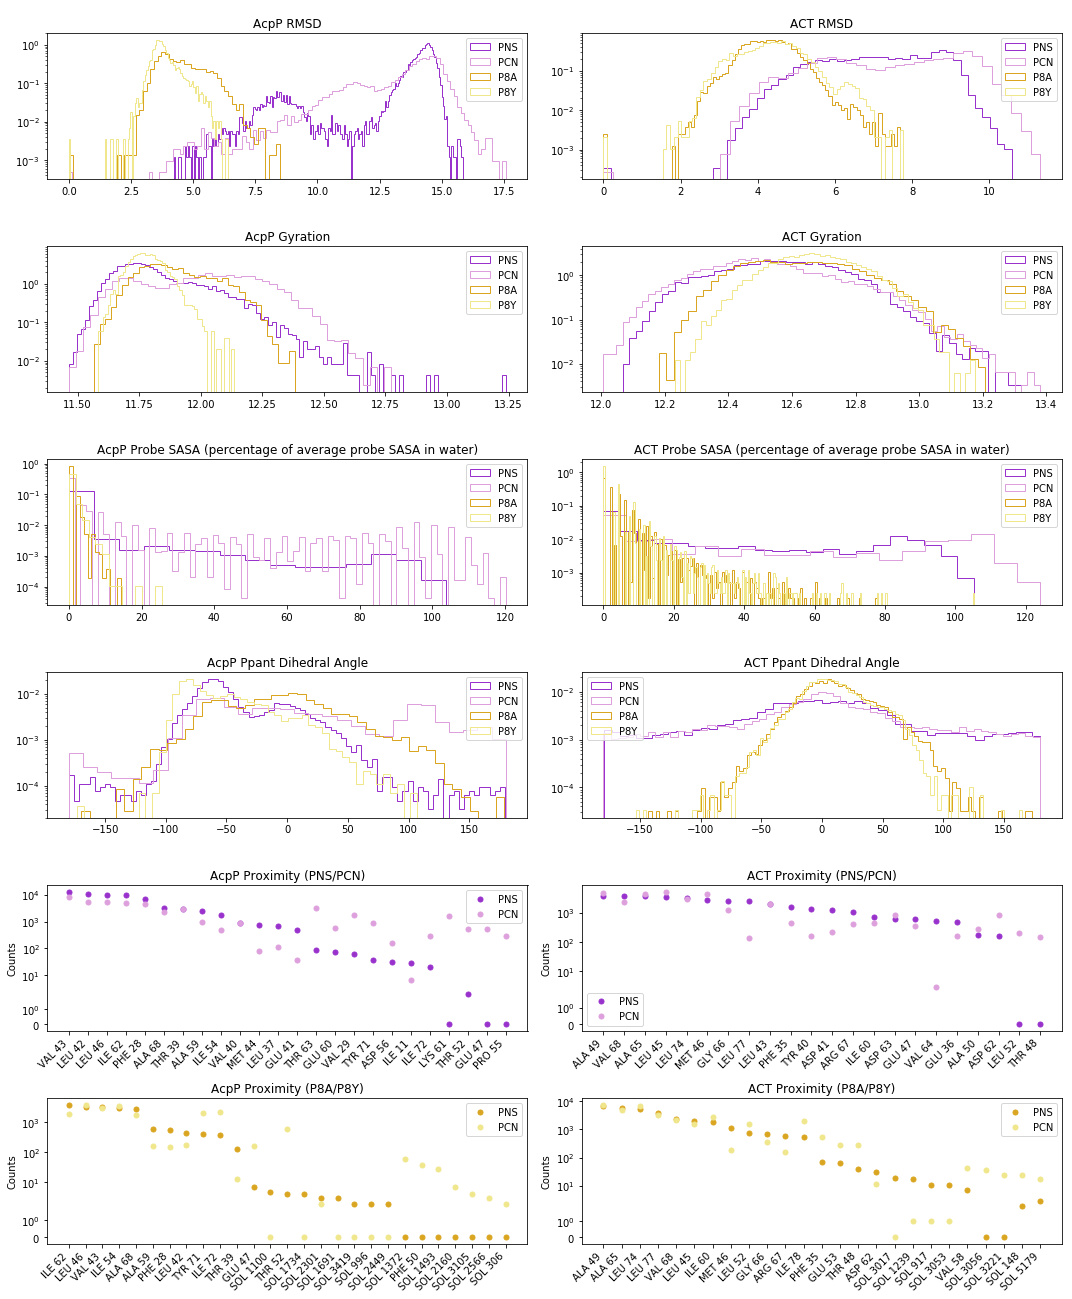

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle(' ', y = 1, fontsize = 'x-large')
gridspec.GridSpec(18,6)

#AcpP RMSD
plt.subplot2grid((18,6), (0,0), colspan=3, rowspan=3)
plt.hist(dRMSD_190612['PNS'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dRMSD_190625['PCN'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(dRMSD_200102['P8A'], 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(dRMSD_200116['P8Y'], 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("AcpP RMSD")

#ACT RMSD
plt.subplot2grid((18,6), (0,3), colspan=3, rowspan=3)
plt.hist(dRMSD_190604_3['PNS'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dRMSD_190604_4['PCN'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(np.concatenate((dRMSD_200106['P8A'], dRMSD_200107['P8A']), axis=None), 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(np.concatenate((dRMSD_200120['P8Y'], dRMSD_200121['P8Y']), axis=None), 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("ACT RMSD")

#AcpP Gyration
plt.subplot2grid((18,6), (3,0), colspan=3, rowspan=3)
plt.hist(dGyration_190612['protein'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dGyration_190625['protein'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(dGyration_200102['protein'], 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(dGyration_200116['protein'], 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("AcpP Gyration")

#ACT Gyration
plt.subplot2grid((18,6), (3,3), colspan=3, rowspan=3)
plt.hist(dGyration_190604_3['protein'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dGyration_190604_4['protein'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(np.concatenate((dGyration_200106['protein'], dGyration_200107['protein']), axis=None), 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(np.concatenate((dGyration_200120['protein'], dGyration_200121['protein']), axis=None), 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("ACT Gyration")

# AcpP SASA
plt.subplot2grid((18,6), (6,0), colspan=3, rowspan=3)
plt.hist(dSASA_190612['SH_percentage'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dSASA_190625['CN_percentage'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(dSASA_200102['C7&C8_percentage'], 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(dSASA_200116['C7&C8_percentage'], 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("AcpP Probe SASA (percentage of average probe SASA in water)")

#ACT SASA
plt.subplot2grid((18,6), (6,3), colspan=3, rowspan=3)
plt.hist(dSASA_190604_3['SH_percentage'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dSASA_190604_4['CN_percentage'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(np.concatenate((dSASA_200106['C7&C8_percentage'], dSASA_200107['C7&C8_percentage']), axis=None), 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(np.concatenate((dSASA_200120['C7&C8_percentage'], dSASA_200121['C7&C8_percentage']), axis=None), 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("ACT Probe SASA (percentage of average probe SASA in water)")

#AcpP Angles
plt.subplot2grid((18,6), (9,0), colspan=3, rowspan=3)
plt.hist(dDihedral_190612['CA-P24-C38-S44'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dDihedral_190625['CA-P24-C38-S44'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(dDihedral_200102['CA-P24-C38-S44'], 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(dDihedral_200116['CA-P24-C38-S44'], 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("AcpP Ppant Dihedral Angle")

# ACT Angles
plt.subplot2grid((18,6), (9,3), colspan=3, rowspan=3)
plt.hist(dDihedral_190604_3['CA-P24-C38-S44'], 'auto', density = 1, color='darkorchid', histtype='step', stacked=True, label='PNS')
plt.hist(dDihedral_190604_4['CA-P24-C38-S44'], 'auto', density = 1, color='plum', histtype='step', stacked=True, label='PCN')
plt.hist(np.concatenate((dDihedral_200106['CA-P24-C38-S44'], dDihedral_200107['CA-P24-C38-S44']), axis=None), 'auto', density = 1, color='goldenrod', histtype='step', stacked=True, label='P8A')
plt.hist(np.concatenate((dDihedral_200120['CA-P24-C38-S44'], dDihedral_200121['CA-P24-C38-S44']), axis=None), 'auto', density = 1, color='khaki', histtype='step', stacked=True, label='P8Y')
plt.legend(loc="best", markerscale=10)
plt.yscale("log")
plt.title("ACT Ppant Dihedral Angle")

#AcpP Prox
ax = plt.subplot2grid((18,6), (12,0), colspan=3, rowspan=3)
ax.plot(prox.xval([lResidues_190612, lResidues_190625]), prox.yval([lResidues_190612, lResidues_190625])[0],  '.', ms = 10, color='darkorchid', label="PNS")
ax.plot(prox.xval([lResidues_190612, lResidues_190625]), prox.yval([lResidues_190612, lResidues_190625])[1],  '.', ms = 10, color='plum', label="PCN")
ax.set_ylabel("Counts")
plt.xticks(prox.xval([lResidues_190612, lResidues_190625]), rotation=45, horizontalalignment='right')
plt.yscale('symlog')
plt.legend(loc="best")
plt.title("AcpP Proximity (PNS/PCN)")

# ACT Prox
ax = plt.subplot2grid((18,6), (12,3), colspan=3, rowspan=3)
ax.plot(prox.xval([lResidues_190604_3, lResidues_190604_4]), prox.yval([lResidues_190604_3, lResidues_190604_4])[0],  '.', ms = 10, color='darkorchid', label="PNS")
ax.plot(prox.xval([lResidues_190604_3, lResidues_190604_4]), prox.yval([lResidues_190604_3, lResidues_190604_4])[1],  '.', ms = 10, color='plum', label="PCN")
ax.set_ylabel("Counts")
plt.xticks(prox.xval([lResidues_190604_3, lResidues_190604_4]), rotation=45, horizontalalignment='right')
plt.yscale('symlog')
plt.legend(loc="best")
plt.title("ACT Proximity (PNS/PCN)")

ax = plt.subplot2grid((18,6), (15,0), colspan=3, rowspan=3)
ax.plot(prox.xval([lResidues_200102, lResidues_200116]), prox.yval([lResidues_200102, lResidues_200116])[0],  '.', ms = 10, color='goldenrod', label="PNS")
ax.plot(prox.xval([lResidues_200102, lResidues_200116]), prox.yval([lResidues_200102, lResidues_200116])[1],  '.', ms = 10, color='khaki', label="PCN")
ax.set_ylabel("Counts")
plt.xticks(prox.xval([lResidues_200102, lResidues_200116]), rotation=45, horizontalalignment='right')
plt.yscale('symlog')
plt.legend(loc="best")
plt.title("AcpP Proximity (P8A/P8Y)")

# ACT Prox
ax = plt.subplot2grid((18,6), (15,3), colspan=3, rowspan=3)
ax.plot(prox.xval([lResidues_200106_200107, lResidues_200120_200121]), prox.yval([lResidues_200106_200107, lResidues_200120_200121])[0],  '.', ms = 10, color='goldenrod', label="PNS")
ax.plot(prox.xval([lResidues_200106_200107, lResidues_200120_200121]), prox.yval([lResidues_200106_200107, lResidues_200120_200121])[1],  '.', ms = 10, color='khaki', label="PCN")
ax.set_ylabel("Counts")
plt.xticks(prox.xval([lResidues_200106_200107, lResidues_200120_200121]), rotation=45, horizontalalignment='right')
plt.yscale('symlog')
plt.legend(loc="best")
plt.title("ACT Proximity (P8A/P8Y)")

fig.set_size_inches(w=15,h=18)
fig.tight_layout()
plt.savefig("Figure2_mockup.png")
plt.show()

- Do we want to include solvent molecules?
    - some are in proximity of search atom for many frames which is interesting, but it also makes the graphs appear to be very differnet when in reality they are not
- are these the right simulations to include (C8 especially)?

# Figure 3:  SASA explanation of observed frequency dependence

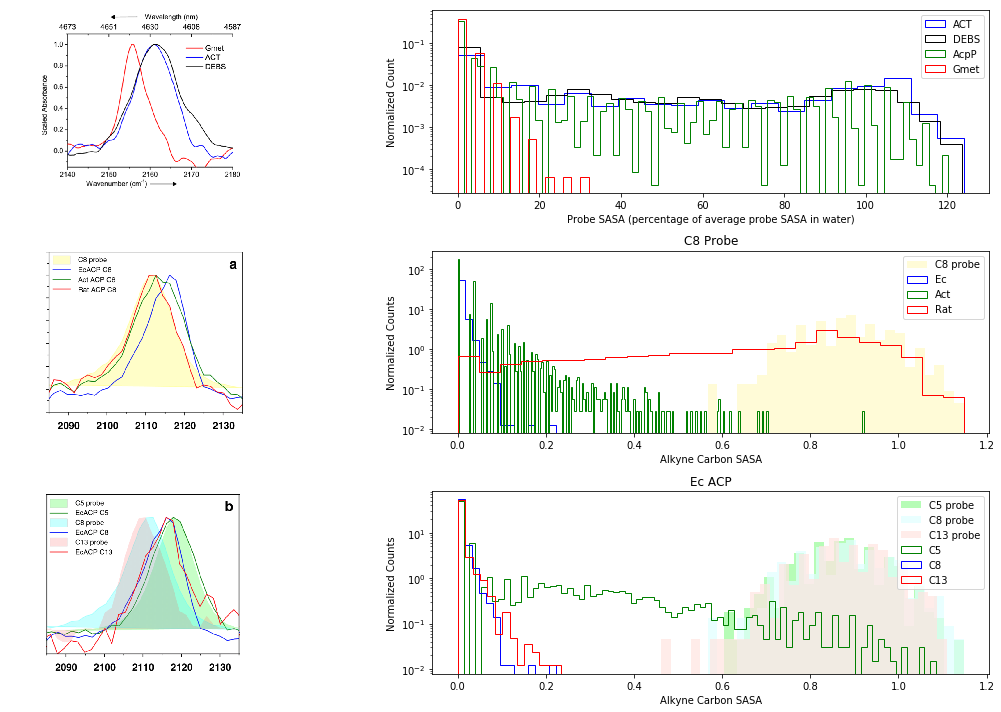

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure(1)
#plt.suptitle('SASA of CN_percentage Probe', y = 1, fontsize = 'x-large')
gridspec.GridSpec(12,12)

ax = plt.subplot2grid((12,12), (0,0), colspan=6, rowspan=4)
ax.imshow(mpimg.imread('fig2_CNAbsorbance_plotOnly.png'))
ax.axes.set_axis_off()

plt.subplot2grid((12,12), (0,6), colspan=6, rowspan=4)
plt.hist(dSASA_190604_4['CN_percentage'], 'auto' , density = 1, color='Blue', histtype='step', stacked=True, label ='ACT')
plt.hist(dSASA_190604_6['CN_percentage'], 'auto' , density = 1, color='Black', histtype='step', stacked=True, label ='DEBS')
plt.hist(dSASA_190625['CN_percentage'], 'auto' , density = 1, color='Green', histtype='step', stacked=True, label ='AcpP')
plt.hist(dSASA_190604_2['CN_percentage'], 'auto' , density = 1, color='Red', histtype='step', stacked=True, label ='Gmet')
plt.legend(loc="upper right")
plt.xlabel("Probe SASA (percentage of average probe SASA in water)")
plt.ylabel("Normalized Count")
plt.yscale('log')
#plt.title("Gm ACP")

ax = plt.subplot2grid((12,12), (4,0), colspan=6, rowspan=4)
ax.imshow(mpimg.imread('fig2a.png'))
ax.axes.set_axis_off()

plt.subplot2grid((12,12), (4,6), colspan=6, rowspan=4)
plt.hist(dSASA_200423['C7&C8'], 'auto', density=1, color='lemonchiffon', alpha=0.8, histtype='stepfilled', stacked=True, label='C8 probe')
plt.hist(dSASA_200116['C7&C8'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='Ec')
plt.hist(np.concatenate((dSASA_200120['C7&C8'], dSASA_200121['C7&C8']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='Act')
plt.hist(dSASA_200125['C7&C8'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='Rat')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.yscale("log")
plt.title("C8 Probe")
plt.legend(loc="upper right", markerscale=10)

ax = plt.subplot2grid((12,12), (8,0), colspan=6, rowspan=4)
ax.imshow(mpimg.imread('fig2b.png'))
ax.axes.set_axis_off()

plt.subplot2grid((12,12), (8,6), colspan=6, rowspan=4)
plt.hist(dSASA_200424['C4&C5'], 'auto', density=1, color='palegreen',  alpha = 0.7, histtype='stepfilled', stacked=True, label='C5 probe')
plt.hist(dSASA_200423['C7&C8'], 'auto', density=1, color='lightcyan', alpha = 0.7, histtype='stepfilled', stacked=True, label='C8 probe')
plt.hist(dSASA_200422['C12&C13'], 'auto', density=1, color='mistyrose', alpha = 0.7, histtype='stepfilled', stacked=True, label='C13 probe')
plt.hist(dSASA_200115['C4&C5'], 'auto', density = 1, color='green', histtype='step', stacked=True, label ='C5')
plt.hist(dSASA_200116['C7&C8'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='C8')
plt.hist(dSASA_200117['C12&C13'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C13')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper right", markerscale=10)
plt.yscale("log")
plt.title("Ec ACP")

fig.set_size_inches(w=16,h=10)
fig.tight_layout()
plt.savefig("Figure3_mockup.png")
plt.show()

Note: SASA of probe is only SASA of last two atoms of the probe

# Figure 4. Structural switching time scales

Act ACP C5- least sequestered starting structure SASA gives good idea of switching

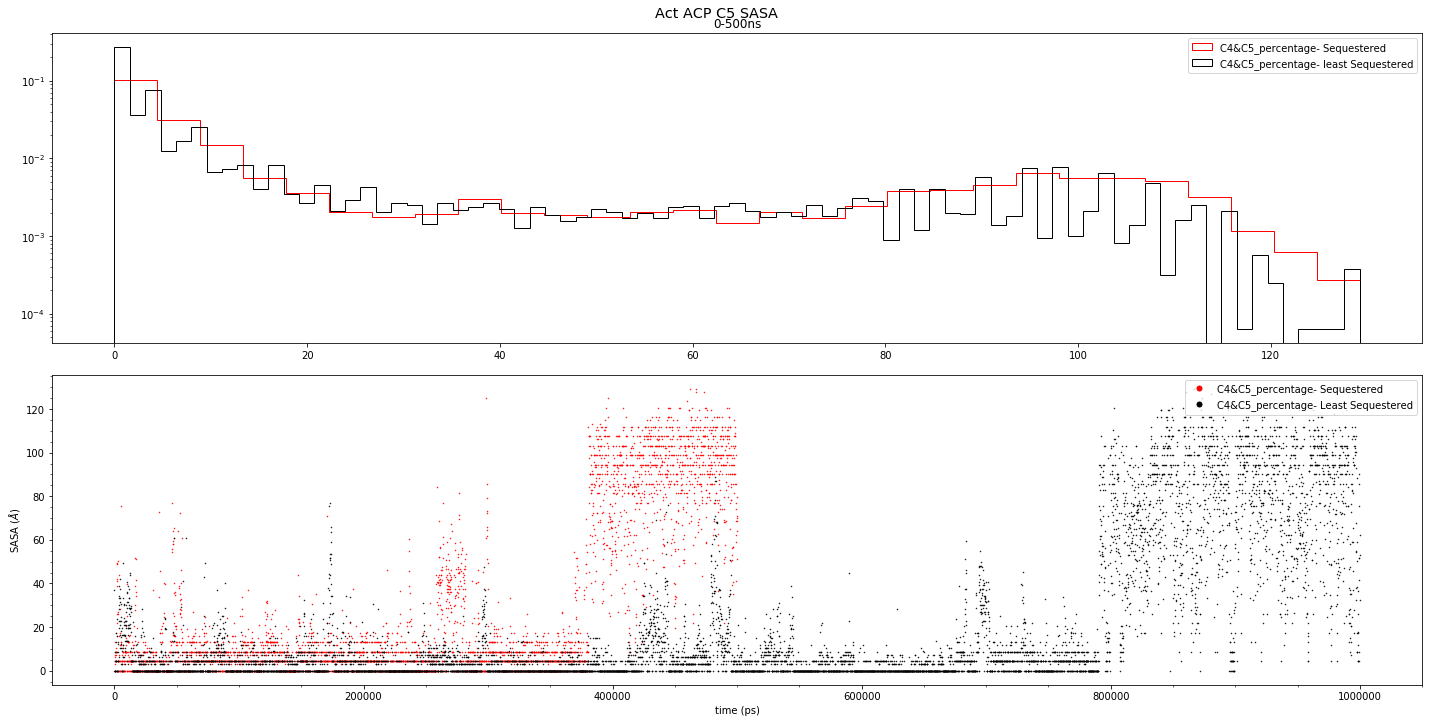

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Act ACP C5 SASA', y = 1, fontsize = 'x-large')
gridspec.GridSpec(10,5)

plt.subplot2grid((10,5), (0,0), colspan=5, rowspan=5)
#plt.hist(dSASA_200118['C2-C5'], 'auto', density = 1, color='black', histtype='step', stacked=True, label ='C2-C5- Sequestered')
#plt.hist(dSASA_200119['C2-C5'], 'auto', density=1, color='gray', histtype='step', stacked = True, label='C2-C5- least sequestered')
plt.hist(dSASA_200118['C4&C5_percentage'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C4&C5_percentage- Sequestered')
plt.hist(dSASA_200119['C4&C5_percentage'], 'auto', density=1, color='black', histtype='step', stacked = True, label='C4&C5_percentage- least Sequestered')
plt.legend(loc="upper right")
plt.yscale("log")
plt.title("0-500ns")

ax = plt.subplot2grid((10,5), (5,0), colspan=5, rowspan=5)
#ax.plot(dSASA_200118['time'], dSASA_200118['C2-C5'],  '.', markersize = 1, color='black', label ='C2-C5- Sequestered')
#ax.plot(dSASA_200119['time'], dSASA_200119['C2-C5'],  '.', markersize = 1, color='gray', label ='C2-C5- least sequestered')
ax.plot(dSASA_200118['time'], dSASA_200118['C4&C5_percentage'],  '.', markersize = 1, color='red', label ='C4&C5_percentage- Sequestered')
ax.plot(dSASA_200119['time'], dSASA_200119['C4&C5_percentage'],  '.', markersize = 1, color='black', label ='C4&C5_percentage- Least Sequestered')

ax.set_xlabel("time (ps)")
ax.set_ylabel(r"SASA ($\AA$)")
plt.minorticks_on()
plt.legend(loc="upper right", markerscale=10)

fig.set_size_inches(w=20,h=10)
fig.tight_layout()
plt.show()

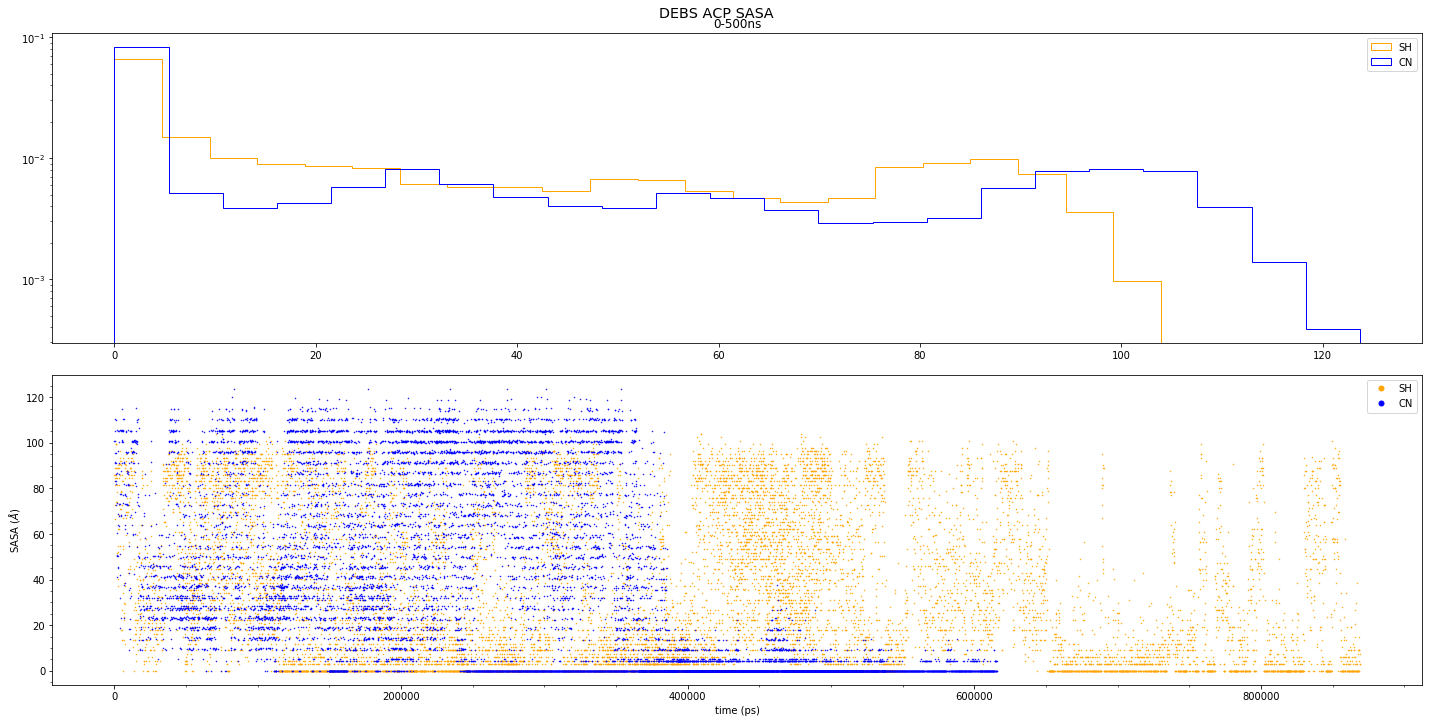

In [6]:
import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('DEBS ACP SASA', y = 1, fontsize = 'x-large')
gridspec.GridSpec(10,5)

plt.subplot2grid((10,5), (0,0), colspan=5, rowspan=5)
plt.hist(dSASA_190604_5['SH_percentage'], 'auto', density = 1, color='orange', histtype='step', stacked=True, label ='SH')
plt.hist(dSASA_190604_6['CN_percentage'], 'auto', density=1, color='blue', histtype='step', stacked = True, label='CN')
plt.legend(loc="upper right")
plt.yscale("log")
plt.title("0-500ns")

ax = plt.subplot2grid((10,5), (5,0), colspan=5, rowspan=5)
ax.plot(dSASA_190604_5['time'], dSASA_190604_5['SH_percentage'],  '.', markersize = 1, color='orange', label ='SH')
ax.plot(dSASA_190604_6['time'], dSASA_190604_6['CN_percentage'],  '.', markersize = 1, color='blue', label ='CN')

ax.set_xlabel("time (ps)")
ax.set_ylabel(r"SASA ($\AA$)")
plt.minorticks_on()
plt.legend(loc="upper right", markerscale=10)

fig.set_size_inches(w=20,h=10)
fig.tight_layout()
plt.show()

- debs ACP SCN SASA (solvent exposed for most of time, then is "buried for significant time"
-

# Additional Figures

## Probes in solvent
- Chemdraw structures of the molecules I ran to get the average SASA of probe in water
- Then SASA histograms for those runs
- Notes:
    - Average used to determine percent solvent exposed (average line shown on histograms)
    - simulations shown below were used to determine percent exposed for all runs

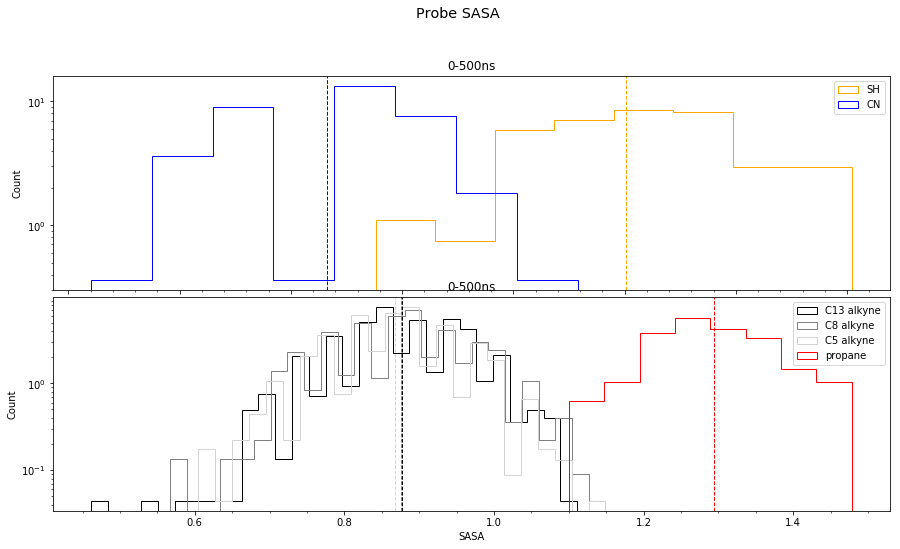

In [21]:
## import matplotlib.pyplot as plt
fig = plt.figure(1)
plt.suptitle('Probe SASA', y = 1, fontsize = 'x-large')
gridspec.GridSpec(10,5)

plt.subplot2grid((10,5), (0,0), colspan=5, rowspan=5)
plt.hist(dSASA_200427['SH'], 'auto', density = 1, color='orange', histtype='step', stacked=True, label ='SH')
plt.axvline(dSASA_200427['SH'].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.hist(dSASA_191016['CN'], 'auto', density=1, color='blue', histtype='step', stacked = True, label='CN')
plt.axvline(dSASA_191016['CN'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.legend(loc="upper right")
plt.yscale("log")
plt.title("0-500ns")
plt.xlabel("SASA")
plt.ylabel("Count")
plt.minorticks_on()
plt.legend(loc="upper right", markerscale=10)

plt.subplot2grid((10,5), (5,0), colspan=5, rowspan=5)
plt.hist(dSASA_200422['C12&C13'], 'auto', density=1, color='black', histtype='step', stacked=True, label='C13 alkyne')
plt.axvline(dSASA_200422['C12&C13'].mean(), color='black', linestyle='dashed', linewidth=1)
plt.hist(dSASA_200423['C7&C8'], 'auto', density=1, color='gray', histtype='step', stacked=True, label='C8 alkyne')
plt.axvline(dSASA_200423['C7&C8'].mean(), color='gray', linestyle='dashed', linewidth=1)
plt.hist(dSASA_200424['C4&C5'], 'auto', density=1, color='lightgray', histtype='step', stacked=True, label='C5 alkyne')
plt.axvline(dSASA_200424['C4&C5'].mean(), color='lightgray', linestyle='dashed', linewidth=1)
plt.hist(dSASA_200426['C2&C3'], 'auto', density=1, color='red', histtype='step', stacked = True, label='propane')
plt.axvline(dSASA_200426['C2&C3'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend(loc="upper right")
plt.yscale("log")
plt.title("0-500ns")
plt.xlabel("SASA")
plt.ylabel("Count")
plt.minorticks_on()
plt.legend(loc="upper right", markerscale=10)

fig.set_size_inches(w=15,h=8)
fig.tight_layout()
plt.show()

## Additional comparisons with Sam E. runs

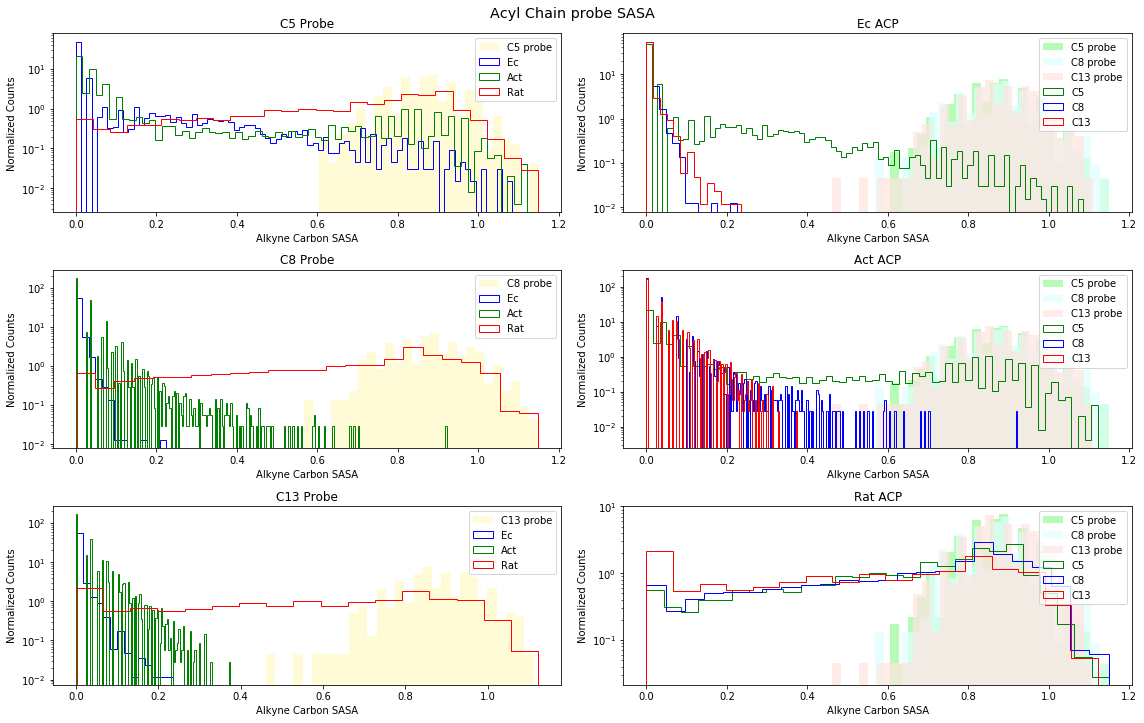

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure(1)
plt.suptitle('Acyl Chain probe SASA', y = 1, fontsize = 'x-large')
gridspec.GridSpec(12,12)

plt.subplot2grid((12,12), (0,0), colspan=6, rowspan=4)
plt.hist(dSASA_200424['C4&C5'], 'auto', density=1, color='lemonchiffon', alpha=0.8, histtype='stepfilled', stacked=True, label='C5 probe')
plt.hist(dSASA_200115['C4&C5'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='Ec')
plt.hist(np.concatenate((dSASA_200118['C4&C5'], dSASA_200119['C4&C5']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='Act')
plt.hist(dSASA_200124['C4&C5'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='Rat')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.yscale("log")
plt.title("C5 Probe")
plt.legend(loc="upper right", markerscale=10)

plt.subplot2grid((12,12), (4,0), colspan=6, rowspan=4)
plt.hist(dSASA_200423['C7&C8'], 'auto', density=1, color='lemonchiffon', alpha=0.8, histtype='stepfilled', stacked=True, label='C8 probe')
plt.hist(dSASA_200116['C7&C8'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='Ec')
plt.hist(np.concatenate((dSASA_200120['C7&C8'], dSASA_200121['C7&C8']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='Act')
plt.hist(dSASA_200125['C7&C8'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='Rat')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.yscale("log")
plt.title("C8 Probe")
plt.legend(loc="upper right", markerscale=10)

plt.subplot2grid((12,12), (8,0), colspan=6, rowspan=4)
plt.hist(dSASA_200422['C12&C13'], 'auto', density=1, color='lemonchiffon', alpha=0.8, histtype='stepfilled', stacked=True, label='C13 probe')
plt.hist(dSASA_200117['C12&C13'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='Ec')
plt.hist(np.concatenate((dSASA_200122['C12&C13'], dSASA_200123['C12&C13']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='Act')
plt.hist(dSASA_200126['C12&C13'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='Rat')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.yscale("log")
plt.title("C13 Probe")
plt.legend(loc="upper right", markerscale=10)

plt.subplot2grid((12,12), (0,6), colspan=6, rowspan=4)
plt.hist(dSASA_200424['C4&C5'], 'auto', density=1, color='palegreen',  alpha = 0.7, histtype='stepfilled', stacked=True, label='C5 probe')
plt.hist(dSASA_200423['C7&C8'], 'auto', density=1, color='lightcyan', alpha = 0.7, histtype='stepfilled', stacked=True, label='C8 probe')
plt.hist(dSASA_200422['C12&C13'], 'auto', density=1, color='mistyrose', alpha = 0.7, histtype='stepfilled', stacked=True, label='C13 probe')
plt.hist(dSASA_200115['C4&C5'], 'auto', density = 1, color='green', histtype='step', stacked=True, label ='C5')
plt.hist(dSASA_200116['C7&C8'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='C8')
plt.hist(dSASA_200117['C12&C13'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C13')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper right", markerscale=10)
plt.yscale("log")
plt.title("Ec ACP")

plt.subplot2grid((12,12), (4,6), colspan=6, rowspan=4)
plt.hist(dSASA_200424['C4&C5'], 'auto', density=1, color='palegreen',  alpha = 0.7, histtype='stepfilled', stacked=True, label='C5 probe')
plt.hist(dSASA_200423['C7&C8'], 'auto', density=1, color='lightcyan', alpha = 0.7, histtype='stepfilled', stacked=True, label='C8 probe')
plt.hist(dSASA_200422['C12&C13'], 'auto', density=1, color='mistyrose', alpha = 0.7, histtype='stepfilled', stacked=True, label='C13 probe')
plt.hist(np.concatenate((dSASA_200119['C4&C5'], dSASA_200118['C4&C5']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='C5')
plt.hist(np.concatenate((dSASA_200120['C7&C8'], dSASA_200121['C7&C8']), axis=None), 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='C8')
plt.hist(np.concatenate((dSASA_200122['C12&C13'], dSASA_200123['C12&C13']), axis=None), 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C13')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper right", markerscale=10)
plt.yscale("log")
plt.title("Act ACP")

plt.subplot2grid((12,12), (8,6), colspan=6, rowspan=4)
plt.hist(dSASA_200424['C4&C5'], 'auto', density=1, color='palegreen',  alpha = 0.7, histtype='stepfilled', stacked=True, label='C5 probe')
plt.hist(dSASA_200423['C7&C8'], 'auto', density=1, color='lightcyan', alpha = 0.7, histtype='stepfilled', stacked=True, label='C8 probe')
plt.hist(dSASA_200422['C12&C13'], 'auto', density=1, color='mistyrose', alpha = 0.7, histtype='stepfilled', stacked=True, label='C13 probe')
plt.hist(dSASA_200124['C4&C5'], 'auto', density = 1, color='green', histtype='step', stacked=True, label ='C5')
plt.hist(dSASA_200125['C7&C8'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='C8')
plt.hist(dSASA_200126['C12&C13'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C13')
plt.xlabel("Alkyne Carbon SASA")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper right", markerscale=10)
plt.yscale("log")
plt.title("Rat ACP")

fig.set_size_inches(w=16,h=10)
fig.tight_layout()
#plt.savefig("Figure3_mockup.png")
plt.show()

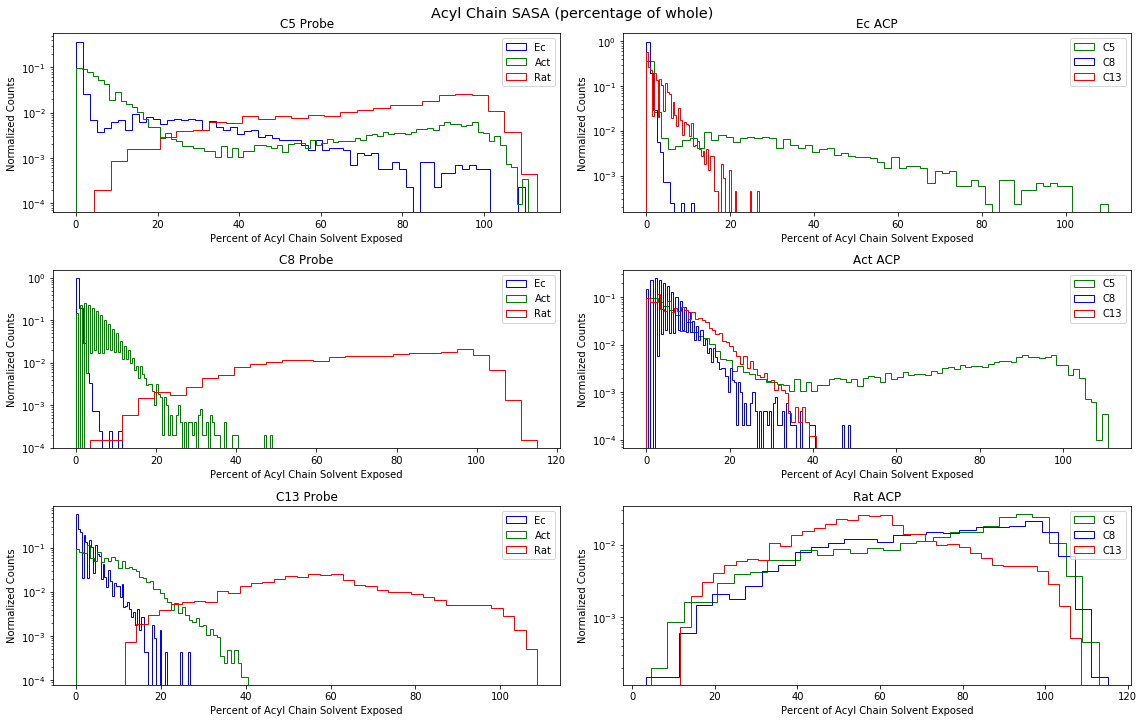

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig = plt.figure(1)
plt.suptitle('Acyl Chain SASA (percentage of whole)', y = 1, fontsize = 'x-large')
gridspec.GridSpec(12,12)

plt.subplot2grid((12,12), (0,0), colspan=6, rowspan=4)
plt.hist(dSASA_200115['C2-C5_percentage'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='Ec')
plt.hist(np.concatenate((dSASA_200118['C2-C5_percentage'], dSASA_200119['C2-C5_percentage']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='Act')
plt.hist(dSASA_200124['C2-C5_percentage'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='Rat')
plt.xlabel("Percent of Acyl Chain Solvent Exposed")
plt.ylabel("Normalized Counts")
plt.yscale("log")
plt.title("C5 Probe")
plt.legend(loc="upper right", markerscale=10)

plt.subplot2grid((12,12), (4,0), colspan=6, rowspan=4)
plt.hist(dSASA_200116['C2-C8_percentage'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='Ec')
plt.hist(np.concatenate((dSASA_200120['C2-C8_percentage'], dSASA_200121['C2-C8_percentage']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='Act')
plt.hist(dSASA_200125['C2-C8_percentage'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='Rat')
plt.xlabel("Percent of Acyl Chain Solvent Exposed")
plt.ylabel("Normalized Counts")
plt.yscale("log")
plt.title("C8 Probe")
plt.legend(loc="upper right", markerscale=10)

plt.subplot2grid((12,12), (8,0), colspan=6, rowspan=4)
plt.hist(dSASA_200117['C2-C13_percentage'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='Ec')
plt.hist(np.concatenate((dSASA_200122['C2-C13_percentage'], dSASA_200123['C2-C13_percentage']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='Act')
plt.hist(dSASA_200126['C2-C13_percentage'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='Rat')
plt.xlabel("Percent of Acyl Chain Solvent Exposed")
plt.ylabel("Normalized Counts")
plt.yscale("log")
plt.title("C13 Probe")
plt.legend(loc="upper right", markerscale=10)

plt.subplot2grid((12,12), (0,6), colspan=6, rowspan=4)
plt.hist(dSASA_200115['C2-C5_percentage'], 'auto', density = 1, color='green', histtype='step', stacked=True, label ='C5')
plt.hist(dSASA_200116['C2-C8_percentage'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='C8')
plt.hist(dSASA_200117['C2-C13_percentage'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C13')
plt.xlabel("Percent of Acyl Chain Solvent Exposed")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper right", markerscale=10)
plt.yscale("log")
plt.title("Ec ACP")

plt.subplot2grid((12,12), (4,6), colspan=6, rowspan=4)
plt.hist(np.concatenate((dSASA_200119['C2-C5_percentage'], dSASA_200118['C2-C5_percentage']), axis=None), 'auto', density = 1, color='green', histtype='step', stacked=True, label ='C5')
plt.hist(np.concatenate((dSASA_200120['C2-C8_percentage'], dSASA_200121['C2-C8_percentage']), axis=None), 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='C8')
plt.hist(np.concatenate((dSASA_200122['C2-C13_percentage'], dSASA_200123['C2-C13_percentage']), axis=None), 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C13')
plt.xlabel("Percent of Acyl Chain Solvent Exposed")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper right", markerscale=10)
plt.yscale("log")
plt.title("Act ACP")

plt.subplot2grid((12,12), (8,6), colspan=6, rowspan=4)
plt.hist(dSASA_200124['C2-C5_percentage'], 'auto', density = 1, color='green', histtype='step', stacked=True, label ='C5')
plt.hist(dSASA_200125['C2-C8_percentage'], 'auto', density = 1, color='blue', histtype='step', stacked=True, label ='C8')
plt.hist(dSASA_200126['C2-C13_percentage'], 'auto', density = 1, color='red', histtype='step', stacked=True, label ='C13')
plt.xlabel("Percent of Acyl Chain Solvent Exposed")
plt.ylabel("Normalized Counts")
plt.legend(loc="upper right", markerscale=10)
plt.yscale("log")
plt.title("Rat ACP")

fig.set_size_inches(w=16,h=10)
fig.tight_layout()
#plt.savefig("Figure3_mockup.png")
plt.show()

# Starting Structures
- The classification of all Ppant arm atoms was changed in the pdb file so they were recognized as part of the newly-parameterized residues

|Run|Description|rcsb pdb|modifications|frame 0 pdb|
|-|-|-|-|-|
|190604.1.1|Gm ACP holo initial|2lml chain 1.1|profix fix=1 prm=2 (only heavy atoms); default pdb2gmx histidine protonation states|[190604.1.1_startingFrame.pdb](PDBs/190604.1.1_startingFrame.pdb)
|190606.1.2|Gm ACP holo replicate started from 290400|-|-|[190604.1.2_md_0ns_noPBC.pdb](PDBs/190604.1.2_md_0ns_noPBC.pdb)
|190604.1.3|Gm ACP holo replicate started from 334500|-|-|[190604.1.3_md_0ns_noPBC.pdb](PDBs/190604.1.3_md_0ns_noPBC.pdb)
|190604.2.1|Gm ACP SCN initial|2lml chain 1.1|holo structure manually cyanylated in chimera according to specs below; default pdb2gmx histidine protonation states|[190604.2.1_startingFrame.pdb](PDBs/190604.2.1_startingFrame.pdb)
|190606.2.2|Gm ACP SCN replicate started from 17800|-|-|[190604.2.2_startingFrame.pdb](PDBs/190604.2.2_startingFrame.pdb)
|190604.2.3|Gm ACP SCN replicate started from 170700|-|-|[190604.2.3_startingFrame.pdb](PDBs/190604.2.3_startingFrame.pdb)
|190604.3.1|Act ACP holo initial|2k0x chain 1.1|profix fix=1 prm=2(only heavy atoms); default pdb2gmx histidine protonation states|[190604.3.1_startingFrame.pdb](PDBs/190604.3.1_startingFrame.pdb)
|190606.3.2|Act ACP holo replicate started from 385100|-|-|[190604.3.2_md_0ns_noPBC.pdb](PDBs/190604.3.2_md_0ns_noPBC.pdb)
|190604.3.3|Act ACP holo replicate started from 58500|-|-|[190604.3.3_startingFrame.pdb](PDBs/190604.3.3_startingFrame.pdb)
|190604.4.1|Act ACP SCN initial|2k0x chain 1.1|holo structure manually cyanylated in chimera according to specs below; default pdb2gmx histidine protonation states|[190604.4.1_startingFrame.pdb](PDBs/190604.4.1_startingFrame.pdb)
|190606.4.2|Act ACP SCN replicate started from 480500|-|-|[190604.4.2_md_0ns_noPBC.pdb](PDBs/190604.4.2_md_0ns_noPBC.pdb)
|190604.4.3|Act ACP SCN replicate started from 22900|-|-|[190604.4.3_md_0ns_noPBC.pdb](PDBs/190604.4.3_md_0ns_noPBC.pdb)
|190604.5.1|DEBS ACP holo initial|2ju1 chain 1.1|Ppant arm manually added to Ser42; profix fix=0 prm=2(only heavy atoms); default pdb2gmx histidine protonation states|[190604.5.1_startingFrame.pdb](PDBs/190604.5.1_startingFrame.pdb)
|190606.5.2|DEBS ACP holo replicate started from 368900|-|-|[190604.5.2_md_0ns_noPBC.pdb](PDBs/190604.5.2_md_0ns_noPBC.pdb)
|190604.5.3|DEBS ACP holo replicate started from 43000|-|-|[190604.5.3_md_0ns_noPBC.pdb](PDBs/190604.5.3_md_0ns_noPBC.pdb)
|190604.6.1|DEBS ACP SCN initial|2ju1 chain 1.1|holo structure manually cyanylated in chimera according to specs below; default pdb2gmx histidine protonation states|[190604.6.1_startingFrame.pdb](PDBs/190604.6.1_startingFrame.pdb )
|190606.6.2|DEBS ACP SCN replicate started from 37700|-|-|[190604.6.2_md_0ns_noPBC.pdb](PDBs/190604.6.2_md_0ns_noPBC.pdb)
|190604.6.3|DEBS ACP SCN replicate started from 115700|-|-|[190604.6.3_md_0ns_noPBC.pdb](PDBs/190604.6.3_md_0ns_noPBC.pdb)
||
|190612.1|AcpP holo initial|4keh|chain D taken from 4keh complex; profix -prm 2 -fix 1; default pdb2gmx histidine protonation states|[190612.1_startingFrame.pdb](PDBs/190612.1_startingFrame.pdb )
|190612.2|AcpP holo replicate started from 3169|-|-|[190612.2_startingFrame.pdb](PDBs/190612.2_startingFrame.pdb)
|190612.3|AcpP holo replicate started from 4543|-|-|[190612.3_startingFrame.pdb](PDBs/190612.3_startingFrame.pdb)
|190625.1|AcpP SCN initial|4keh|holo structure manually cyanylated in chimera according to specs below; profix -prm 2 -fix 1; default pdb2gmx histidine protonation states|[190625.1_startingFrame.pdb](PDBs/190625.1_startingFrame.pdb )
|190625.2|AcpP SCN replicate started from 297100|-|-|[190625.2_startingFrame.pdb](PDBs/190625.2_startingFrame.pdb)
|190625.3|AcpP SCN replicate started from 58100|-|-|[190625.3_startingFrame.pdb](PDBs/190625.3_startingFrame.pdb)
|190626.1|AcpP-2FabA holo initial|4keh|chains A,B,D taken from 4keh complex; profix -prm 2 -fix 1; default pdb2gmx histidine protonation states except for His70 on FabA which I specififed as HisD|[190626.1_startingFrame.pdb](PDBs/190626.1_startingFrame.pdb )
|190626.2|AcpP-2FabA holo replicate started from 163200|-|-|[190626.2_md_0ns.pdb](PDBs/190626.2_md_0ns.pdb)
|190626.3|AcpP-2FabA holo replicate started from 145400|-|-|[190626.3_md_0ns.pdb](PDBs/190626.3_md_0ns.pdb)
|190627.1|AcpP-2FabA SCN initial|4keh|holo structure manually cyanylated in chimera according to specs below; profix -prm 2 -fix 1; default pdb2gmx histidine protonation states|[190627.1_startingFrame.pdb](PDBs/190627.1_startingFrame.pdb )
|190627.2|AcpP-2FabA SCN replicate started from 307800|-|-|[190627.2_md_0nse.pdb](PDBs/190627.2_md_0ns.pdb)
|190627.3|AcpP-2FabA SCN replicate started from 123500|-|-|[190627.3_md_0ns.pdb](PDBs/190627.3_md_0ns.pdb)
|190628.1|2AcpP-2FabA holo initial|4keh|chains A,B,C,D taken from 4keh complex; profix -prm 2 -fix 1; default pdb2gmx histidine protonation states except for His70 on FabA which I specififed as HisD|[190628.1_startingFrame.pdb](PDBs/190628.1_startingFrame.pdb )
|190628.2|2AcpP-2FabA holo replicate started from 316800|-|-|[190628.2_md_500_noPBC.pdb](PDBs/190628.2_md_500_noPBC.pdb)
|190628.3|2AcpP-2FabA holo replicate started from 400400|-|-|[190628.3_md_500_noPBC.pdb](PDBs/190628.3_md_500_noPBC.pdb)
|190629.1|2AcpP-2FabA SCN initial|4keh|holo structure manually cyanylated in chimera according to specs below; profix -prm 2 -fix 1; default pdb2gmx histidine protonation states|[190629.1_startingFrame.pdb](PDBs/190629.1_startingFrame.pdb )
|190629.2|2AcpP-2FabA SCN replicate started from 307800|-|-|[190629.2_md_500_noPBC.pdb](PDBs/190629.2_md_500_noPBC.pdb)
|190629.3|2AcpP-2FabA SCN replicate started from 123500|-|-|[190629.3_md_500_noPBC.pdb](PDBs/190629.3_md_500_noPBC.pdb)
||
|200101|AcpP P5A |2FAC|chain A|[200101_md_0.pdb](PDBs/200101_md_0.pdb)
|200102|AcpP P8A |2FAD|chain A|[200102_md_0.pdb](PDBs/200102_md_0.pdb)
|200103|AcpP PDA|2FAE|chain A|[200103_md_0.pdb](PDBs/200103_md_0.pdb)
|200104|Act ACP P5A- most Sequestered|2KGA|chain 6|[200104_md_0.pdb](PDBs/200104_md_0.pdb)
|200105|Act ACP P5A- least Sequestered|2KGA|chain 14| [200105_md_0.pdb](PDBs/200105_md_0.pdb)
|200106|Act ACP P8A- most Sequestered|2KGC|chain 19| [200106_md_0.pdb](PDBs/200106_md_0.pdb)
|200107|Act ACP P8A- least Sequestered|2KGC|chain 1| [200107_md_0.pdb](PDBs/200107_md_0.pdb)
|200108|Act ACP PDA- most Sequestered|2KGC|chain 19| [200108_md_0.pdb](PDBs/200108_md_0.pdb)
|200109|Act ACP PDA- least Sequestered|2KGC|chain 1| [200109_md_0.pdb](PDBs/200109_md_0.pdb)
|200110|AcpP PNS |2PNG|chain A|[200110_md_0.pdb](PDBs/200110_md_0.pdb)
|200111|AcpP P8A |2PNG|chain A; no rscb structure available with acyl chain|[200111_md_0.pdb](PDBs/200111_md_0.pdb)
|200112|AcpP PDA|2PNG|chain A; no rscb structure available with acyl chain|[200112_md_0.pdb](PDBs/200112_md_0.pdb)
|200113|AcpP PDA|2PNG|chain A; no rscb structure available with acyl chain|[200113_md_0.pdb](PDBs/200113_md_0.pdb)
|200115|AcpP P5Y |2FAC|chain A; last 2 carbons manually oxidized in Chimera|[200115_md_0.pdb](PDBs/200115_md_0.pdb)
|200116|AcpP P8Y |2FAD|chain A; last 2 carbons manually oxidized in Chimera|[200116_md_0.pdb](PDBs/200116_md_0.pdb)
|200117|AcpP PDY|2FAE|chain A; last 2 carbons manually oxidized in Chimera|[200117_md_0.pdb](PDBs/200117_md_0.pdb)
|200118|Act ACP P5Y- most Sequestered|2KGA|chain 6; last 2 carbons manually oxidized in Chimera| [200118_md_0.pdb](PDBs/200118_md_0.pdb)
|200119|Act ACP P5Y- least Sequestered|2KGA|chain 14; last 2 carbons manually oxidized in Chimera| [200119_md_0.pdb](PDBs/200119_md_0.pdb)
|200120|Act ACP P8Y- most Sequestered|2KGC|chain 19; last 2 carbons manually oxidized in Chimera| [200120_md_0.pdb](PDBs/200120_md_0.pdb)
|200121|Act ACP P8Y- least Sequestered|2KGC|chain 1; last 2 carbons manually oxidized in Chimera| [200121_md_0.pdb](PDBs/200121_md_0.pdb)
|200122|Act ACP PDY- most Sequestered|2KGC|chain 19; last 2 carbons manually oxidized in Chimera| [200122_md_0.pdb](PDBs/200122_md_0.pdb)
|200123|Act ACP PDY- least Sequestered|2KGC|chain 1; last 2 carbons manually oxidized in Chimera| [200123_md_0.pdb](PDBs/200123_md_0.pdb)
|200124|AcpP P8Y |2PNG|chain A; no rscb structure available with acyl chain; last 2 carbons manually oxidized in Chimera|[200124_md_0.pdb](PDBs/200124_md_0.pdb)
|200125|AcpP PDY|2PNG|chain A; no rscb structure available with acyl chain; last 2 carbons manually oxidized in Chimera|[200125_md_0.pdb](PDBs/200125_md_0.pdb)
|200126|AcpP PDY|2PNG|chain A; no rscb structure available with acyl chain; last 2 carbons manually oxidized in Chimera|[200126_md_0.pdb](PDBs/200126_md_0.pdb)



- all structures derived from 4keh
    - water and ions from original pdb file were stripped
    - water and ions were added back in using gromacs
- Acyl chain sructures
    - rcsb pdbs were edited to include only 1 chain
    - acyl chain length was manually edited using chimera
        - rcsb structure with closest acyl length was used
    - most/least sequestered chains from NMR structures were determined by eye


[document by Rachel Baskin](https://drive.google.com/file/d/0B2J7G2k8A1A1c0lvYTRZeTEwZWs/view?ts=5c8fb812) that outlines how to edit a PDB file. Below are the key points:

- Build structure in Chimera
- Edit bond lengths and angles to match those in [Rachels thesis](https://drive.google.com/file/d/0B2J7G2k8A1A1c0lvYTRZeTEwZWs/view?ts=5c8fb812)
    - Bond lengths
        - S - Cnitrile 1.688 A
        - Cnitrile - Nnitrile 1.156 A
    - Bond Angles
        - C - S - Cnitrile 100.06 degrees
        - S - Cnitrile - Nnitrile = 177.80